In [1]:
import pandas as pd

# Laad de dataset
file_path = r"DailyDelhiClimateTrain.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


looks like the dataset is correctly imported, lets visualise it in the next step

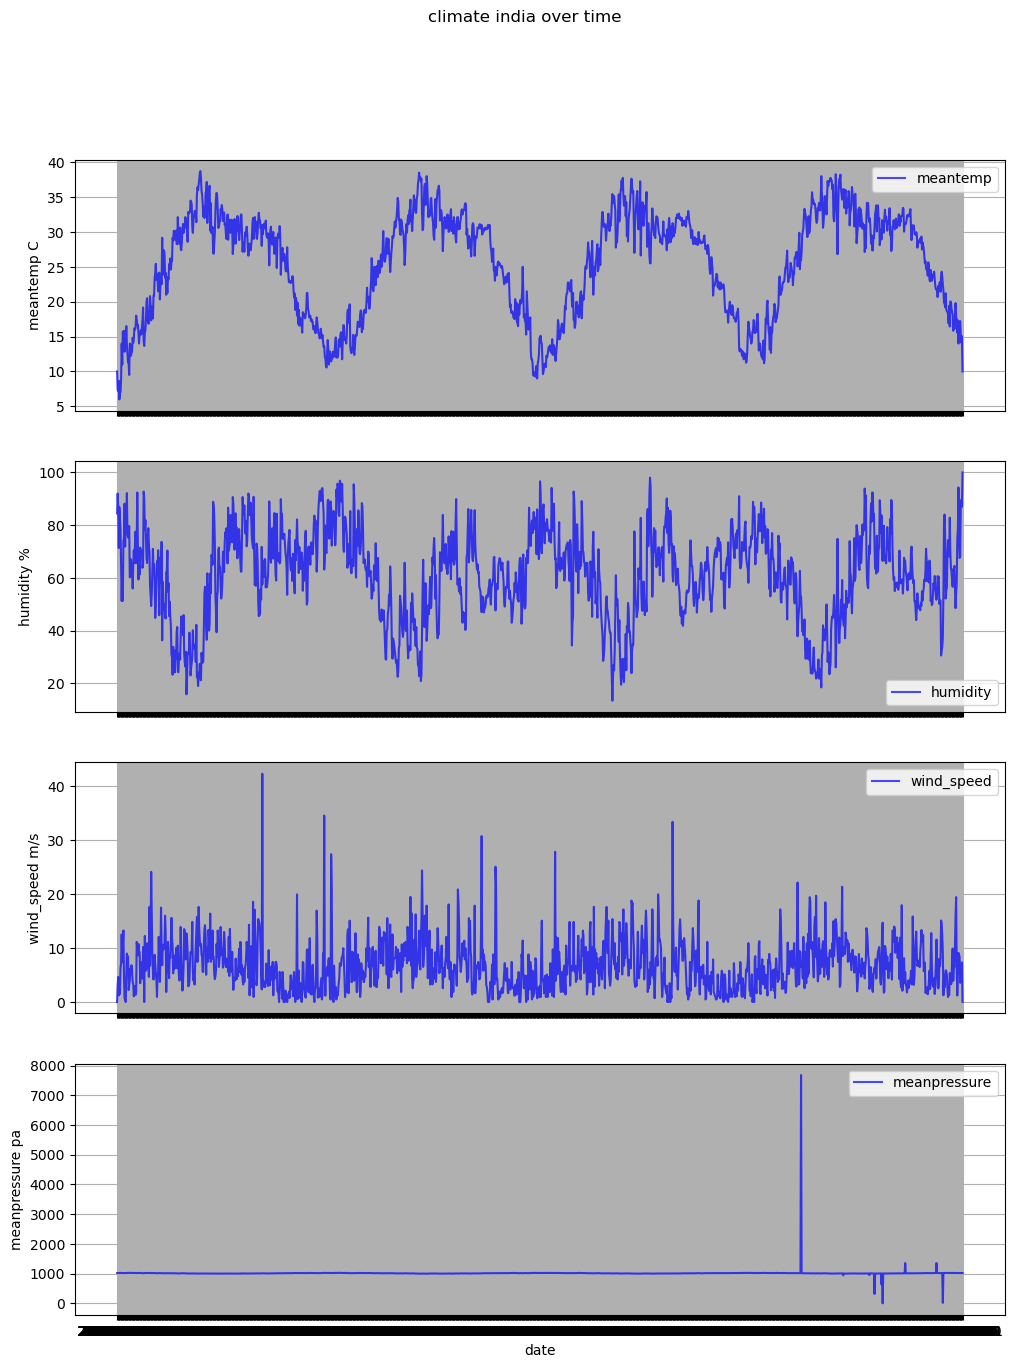

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 15), sharex=True)

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
features_meantemp = features[0]
meantemp_array = df[features_meantemp].to_numpy()
titles = ['meantemp C', 'humidity %', 'wind_speed m/s', 'meanpressure pa']

for i, feature in enumerate(features):
    axes[i].plot(df['date'], df[feature], label=feature, color='b', alpha=0.7)
    axes[i].set_ylabel(titles[i])
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("date")
plt.suptitle("climate india over time")
plt.show()


i've chosen the mean temp c as the feature i want to impute.

In [4]:
import numpy as np


#lowpassfilter
m = 100

filter = np.ones(m) / m

In [5]:
meantemp_array

array([10.        ,  7.4       ,  7.16666667, ..., 14.0952381 ,
       15.05263158, 10.        ])

In [6]:
vector = np.convolve(meantemp_array, filter)

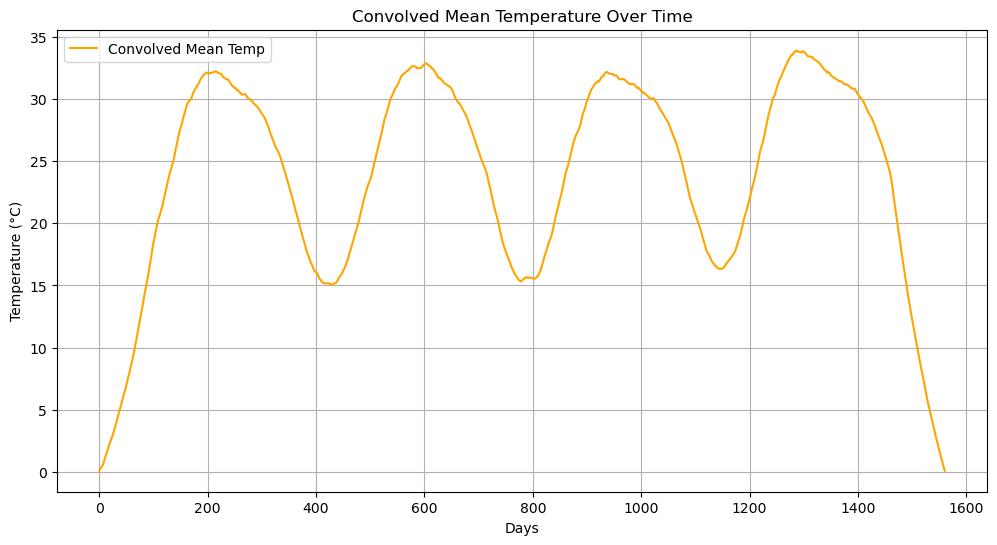

In [7]:
# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(vector, label='Convolved Mean Temp', color='orange')
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.title('Convolved Mean Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

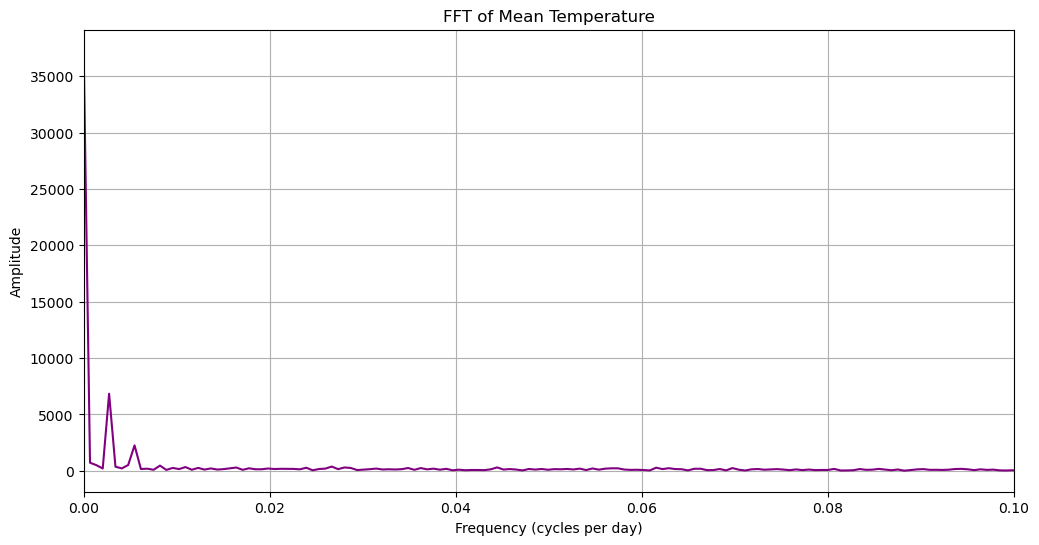

In [8]:
# Compute the FFT
fft_result = np.fft.fft(meantemp_array)
frequencies = np.fft.fftfreq(len(meantemp_array), d=1)  # d=1 means daily samples

# Only plot the positive half of frequencies
half_n = len(frequencies) // 2
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:half_n], np.abs(fft_result)[:half_n], color='purple')

plt.title('FFT of Mean Temperature')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Amplitude')
plt.xlim([0, 0.1])  # Zoom in on the low-frequency range
plt.grid(True)
plt.show()

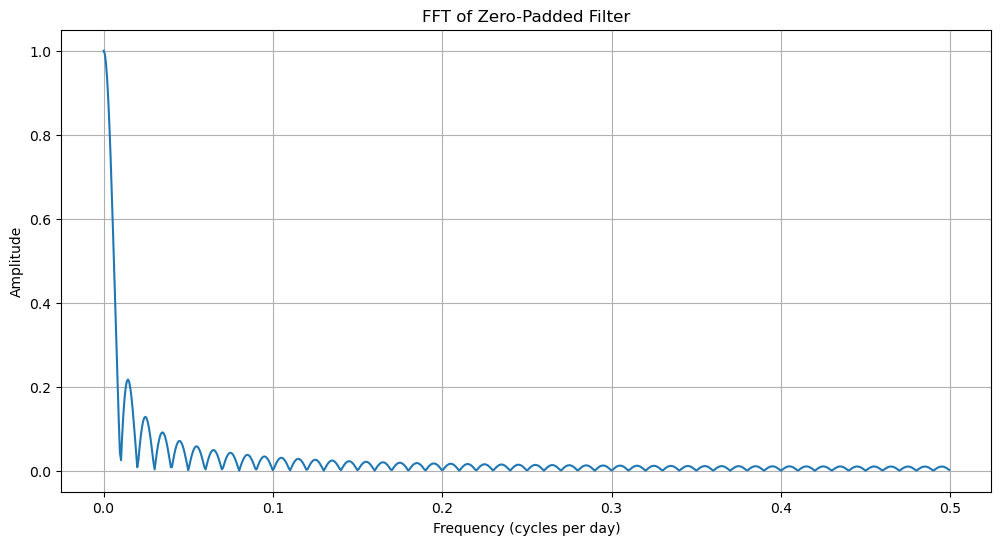

In [9]:
# Suppose you want to pad it to the same length as meantemp_array
desired_length = 1462  # Example, set this to len(meantemp_array) if available

# Zero-padding
padded_filter = np.pad(filter, (0, desired_length - len(filter)), 'constant')

# Compute FFT of the zero-padded filter
fft_filter = np.fft.fft(padded_filter)
frequencies = np.fft.fftfreq(len(padded_filter), d=1)

# Plot the FFT (magnitude)
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_filter)[:len(frequencies)//2])
plt.title('FFT of Zero-Padded Filter')
plt.xlabel('Frequency (cycles per day)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()